### House Price Prediction Model using RandomForestRegressor

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore" , category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score , mean_absolute_error , mean_squared_error , r2_score

In [2]:
#importing the dataset
df = pd.read_csv("E:\\ML\\Copy of house_price.csv")
print(df.head())

       Location  BHK  Furnishing  Sq.ft  Old(years)  Floor  Price
0  Bommanahalli    3           1   3000           1      3  28000
1  Bommanahalli    3           1   1650          10      0  18000
2    Whitefield    2           0   1000           5      3  16400
3    Whitefield    3           0   1600           1      9  27000
4    Whitefield    2           1   1200           5      1  20000


In [3]:
print(df.size)
print(df.shape)

7000
(1000, 7)


<AxesSubplot:>

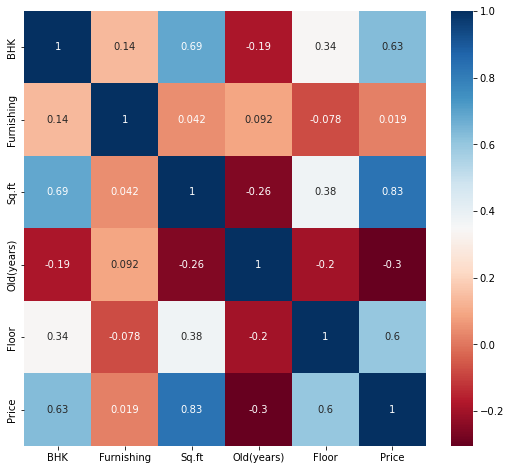

In [4]:
# Exploratory Data Analysis
plt.figure(figsize=(9,8))
sns.heatmap(df.corr() , annot=True,cmap = 'RdBu')

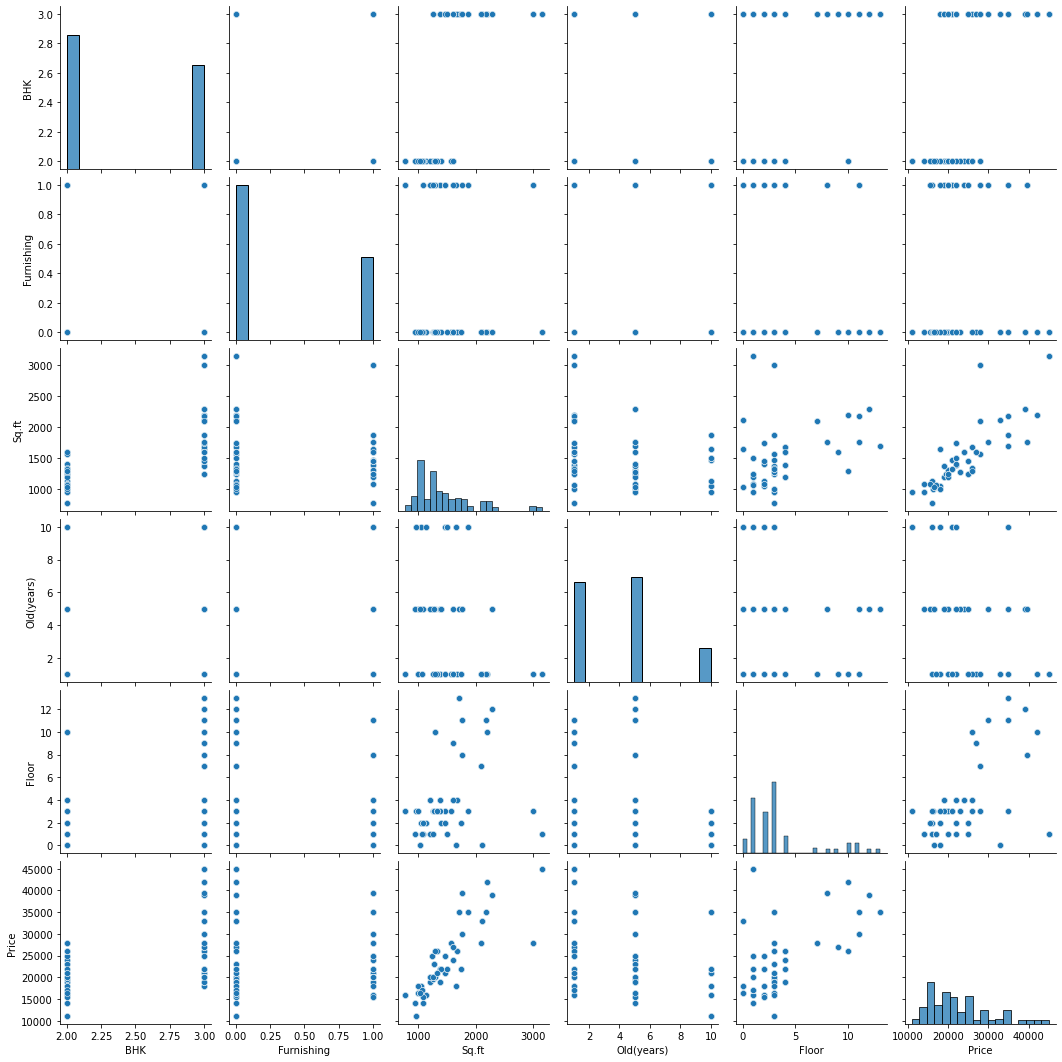

In [5]:
sns.pairplot(df)

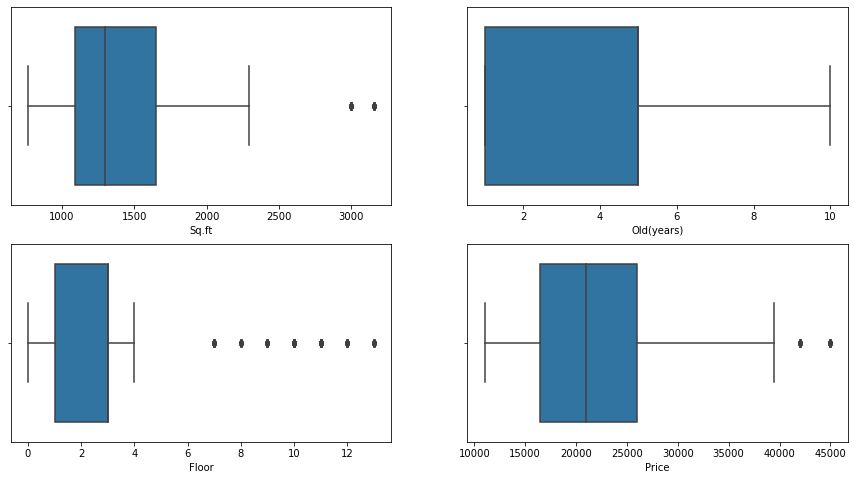

In [6]:
# finding the outliers
x = plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(df['Sq.ft'])
plt.subplot(2,2,2)
sns.boxplot(df['Old(years)'])
plt.subplot(2,2,3)
sns.boxplot(df['Floor'])
plt.subplot(2,2,4)
sns.boxplot(df['Price'])
plt.show()

In [7]:
out_features = ['Sq.ft','Floor']
for v in out_features:
    q1 = df[v].quantile(0.75)
    q2 = df[v].quantile(0.25)
    iqr = q1-q2
    up_bound = q1 + 1.5*iqr
    lo_bound = q2 - 1.5*iqr
    for i in df[v]:
        if i<lo_bound or i>up_bound:
            df.loc[df[v]==i,v] = df[v].median()

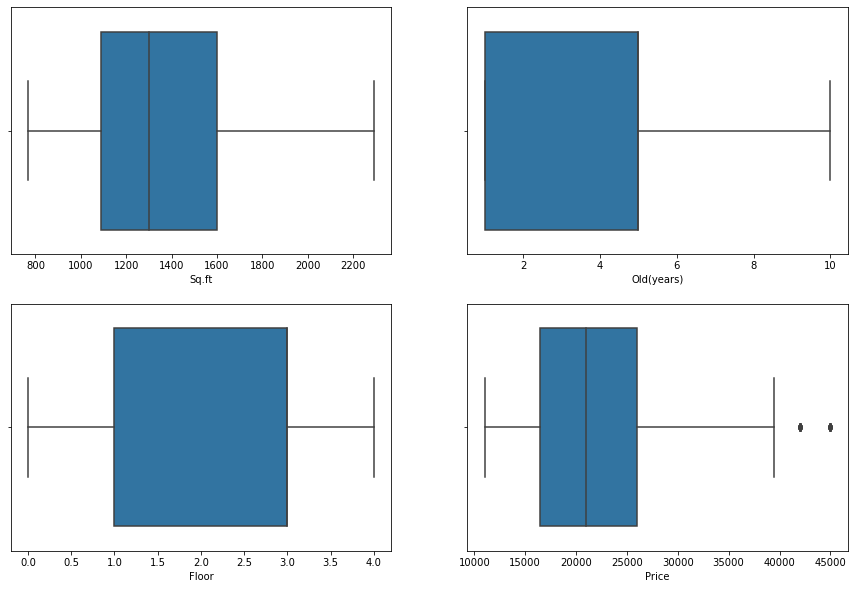

In [8]:
#visualizing the features after removing the outliers
x = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(df['Sq.ft'])
plt.subplot(2,2,2)
sns.boxplot(df['Old(years)'])
plt.subplot(2,2,3)
sns.boxplot(df['Floor'])
plt.subplot(2,2,4)
sns.boxplot(df['Price'])
plt.show()

In [9]:
#separating independent and dependent variables
x = df.iloc[:,:7].values
y = df.iloc[:,-1].values
print(x.shape)

(1000, 7)


In [10]:
#since the Location feature is an "object(dtype)", we will have to convert it into "int(dtype)",hence
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x = ct.fit_transform(x)
print(x)

[[1.0 0.0 3 ... 1 3 28000]
 [1.0 0.0 3 ... 10 0 18000]
 [0.0 1.0 2 ... 5 3 16400]
 ...
 [1.0 0.0 2 ... 5 0 16500]
 [1.0 0.0 3 ... 10 1 22000]
 [0.0 1.0 3 ... 5 3 30000]]


In [11]:
#train-test splitting
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.1,random_state=0)

In [12]:
#initializing RandomForestRegressor
rf = RandomForestRegressor()

In [13]:
#training the model using training data
rf.fit(x_tr,y_tr)

RandomForestRegressor()

In [14]:
#predicting model accuracy
y_pr = rf.predict(x_te)
r2_score(y_te,y_pr)

1.0

<IPython.core.display.Javascript object>


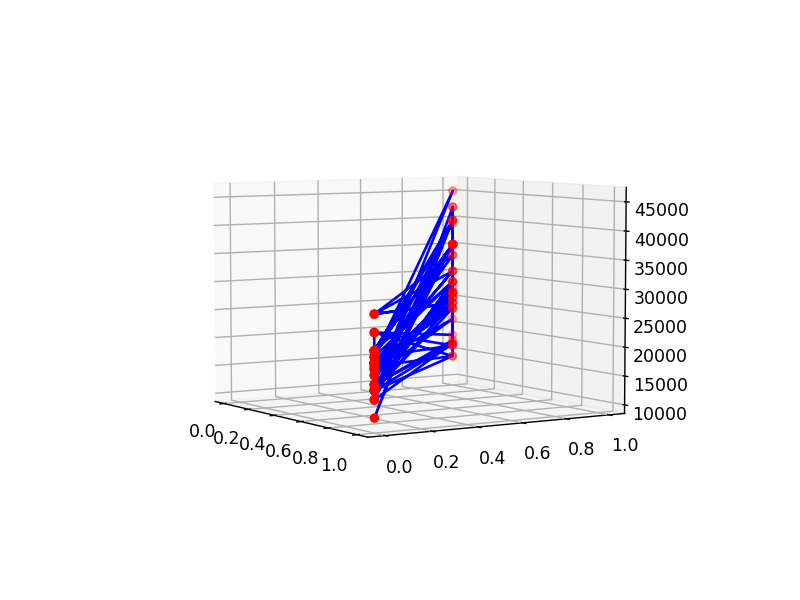

In [15]:
%matplotlib notebook
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection='3d')
ax.scatter3D(x_te[:,0],x_te[:,1],y_te,c='red')
ax.plot3D(x_te[:,0],x_te[:,1],y_pr,c='blue')
plt.show()